In [26]:
# importando as bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from time import time

dataset  = load_wine()
df1= pd.DataFrame(dataset.data,columns=dataset.feature_names)

(n_samples, n_features), n_digits = data.data.shape, np.unique(data.target_names).size

print(f"# digitos: {n_digits}; # amostra: {n_samples}; # características: {n_features}")

#print(data.data.shape)
dataset.feature_names

#plt.gray()
#plt.matshow(data.images[1])
#plt.show()

# digitos: 3; # amostra: 178; # características: 13


['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [27]:
# Verificando as classes de saída
print(data.target_names)
# Verificando os atributos de entrada
print(data.feature_names)
# Verificando 
print('Dimensões(atributos) do dataset: ', dataset.data.shape)

['class_0' 'class_1' 'class_2']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Dimensões(atributos) do dataset:  (178, 13)


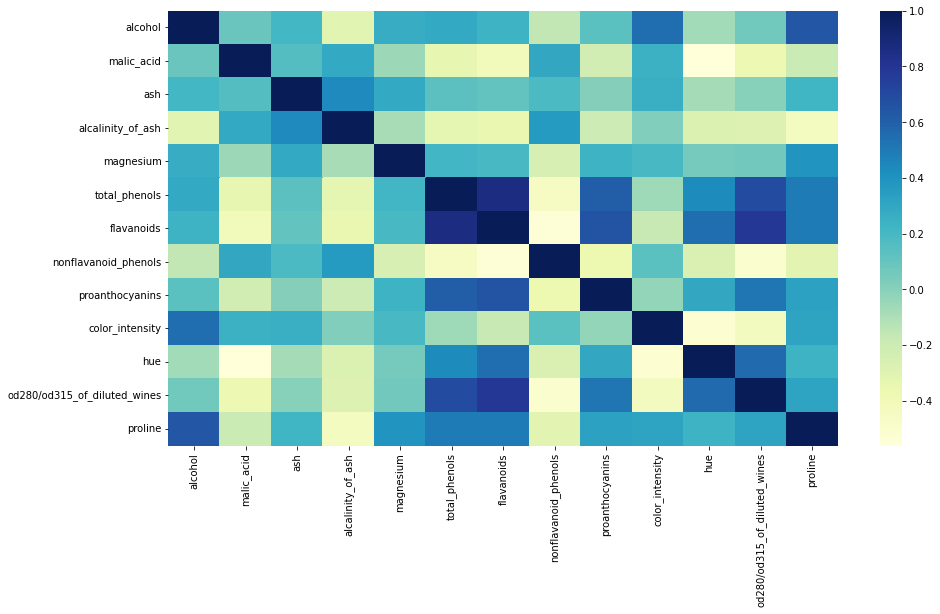

In [28]:
# Analise a matriz de correlações dos dados.

# Cálculo da matriz de correlações
corr = df1.iloc[:,0:13].corr()
corr


# Mapa de calor das correlações
plt.figure(figsize = (15,8))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="YlGnBu" )

# quais variáveis tem as maiores correlações: 

alchol com color_intensyty

alchol com proline

total_phenols com flavanoids

total_phenols com proanthocyanins

total_phenols com od280/od315_of_diluted_wines

flavanoids com total_phenols

flavanoids com od280/od315_of_diluted_wines

proanthocyanins com total_penols

proanthocyanins com flavanoids

color_intensity com alcohol

hue com flavanoids

hue com od280/od315_of_diluted_wines

od280/od315_of_diluted_wines com total_penols

od280/od315_of_diluted_wines com proanthocyanins

od280/od315_of_diluted_wines com flavanoids

od280/od315_of_diluted_wines com hue

In [30]:
# ========== PCA ============== #
# Set the n_components=2
principal=PCA(n_components=2)
principal.fit(df1)
x = principal.transform(df1)
# ========== PCA ============== #
 
# Check the dimensions of data after PCA
print('Dimensões: ', x.shape)

# Check the values of eigen vectors
# prodeced by principal components
print('Componentes: ', principal.components_)
# check how much variance is explained by each principal component
print('Variâncida das componentes: ', principal.explained_variance_ratio_)
print('Variâncida somada: ', principal.explained_variance_ratio_.cumsum())

Dimensões:  (178, 2)
Componentes:  [[ 1.65926472e-03 -6.81015556e-04  1.94905742e-04 -4.67130058e-03
   1.78680075e-02  9.89829680e-04  1.56728830e-03 -1.23086662e-04
   6.00607792e-04  2.32714319e-03  1.71380037e-04  7.04931645e-04
   9.99822937e-01]
 [ 1.20340617e-03  2.15498184e-03  4.59369254e-03  2.64503930e-02
   9.99344186e-01  8.77962152e-04 -5.18507284e-05 -1.35447892e-03
   5.00440040e-03  1.51003530e-02 -7.62673115e-04 -3.49536431e-03
  -1.77738095e-02]]
Variâncida das componentes:  [0.99809123 0.00173592]
Variâncida somada:  [0.99809123 0.99982715]


# Informar quantas componentes principais são necessárias para ter uma variabilidade dos dados maior que 90% e  95%

2 ou 1 componentes ja são necessario para ter uma variabilidade dos dados maior que 90% e  95% (Nesse caso usei com 2 componentes.)

In [31]:
# Rodando o K-Means

t0 = time()
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)

df = kmeans.fit_transform(data.data)

t1 = time()
print(t1 - t0)
label = kmeans.fit_predict(df)

0.0162351131439209


# Rodando o PCA com 2 componentes.

In [32]:
# PCA e K-Means

t0 = time()
reduced_data = PCA(n_components=2).fit_transform(data.data)
t1_pca = time()
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)
t1_kmeans = time()
t1 = time()

print('tempo total: ', t1 - t0)
print('tempo PCA: ', t1_pca - t0)
print('tempo KMeans: ', t1_kmeans - t0)

tempo total:  0.010818243026733398
tempo PCA:  0.0012192726135253906
tempo KMeans:  0.01079416275024414
